# Lending Club Case Study

--------

### 1. Data Understanding

In [80]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [81]:
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [82]:
df = pd.read_csv("./loan.csv") 

In [83]:
print(df.shape)
print(df.columns)
df.head()

(39717, 111)
Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [84]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,39717.0,683131.913060,210694.132915,54734.0,516221.0,665665.0,837755.0,1077501.0
member_id,39717.0,850463.559408,265678.307421,70699.0,666780.0,850812.0,1047339.0,1314167.0
loan_amnt,39717.0,11219.443815,7456.670694,500.0,5500.0,10000.0,15000.0,35000.0
funded_amnt,39717.0,10947.713196,7187.238670,500.0,5400.0,9600.0,15000.0,35000.0
funded_amnt_inv,39717.0,10397.448868,7128.450439,0.0,5000.0,8975.0,14400.0,35000.0
...,...,...,...,...,...,...,...,...
tax_liens,39678.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
tot_hi_cred_lim,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_bal_ex_mort,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_bc_limit,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
df.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

### 1. Data Cleaning

1. Fill all the Null columns with Mean/ Mode/ Median as per the data
2. Remove Unnecessary columns / Duplcate columns which can be dervided from existing columns


##### [a] Identifying null value columns & remioving from analysis

1. Identify & exclude columns which has more than 90% nulls
2. Identify & exclude columns with only 1 distinct value

In [86]:
# identify columns which has more than 90% nulls
col_na = pd.DataFrame(df.isna().sum(), columns = ["count"])
print(0.1*len(df))
col_na1 = col_na[col_na["count"] >= 0.5*len(df)]
col_na1

3971.7000000000003


,count
mths_since_last_delinq,25682
mths_since_last_record,36931
next_pymnt_d,38577
mths_since_last_major_derog,39717
annual_inc_joint,39717
dti_joint,39717
verification_status_joint,39717
tot_coll_amt,39717
tot_cur_bal,39717
open_acc_6m,39717


In [87]:
col_na["count"].min(),col_na["count"].max()

(0, 39717)

In [88]:
col_na1["count"].min(),col_na1["count"].max()

(25682, 39717)

In [89]:
col_na1.index

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_t

In [90]:
# Identify columns with 1 unique value
col_uni = pd.DataFrame(df.nunique(), columns = ["count"])
# print(0.1*len(df1))
col_uni1 = col_uni[col_uni["count"] == 1]
col_uni1

,count
pymnt_plan,1
initial_list_status,1
collections_12_mths_ex_med,1
policy_code,1
application_type,1
acc_now_delinq,1
chargeoff_within_12_mths,1
delinq_amnt,1
tax_liens,1


In [91]:
len(set(df.columns) - set(col_na1.index) - set(col_uni1.index))

45

In [92]:
# [x for x in df.columns if x not in set(col_na1.index)]

In [93]:
df1 = df[list(set(df.columns) - set(col_na1.index) - set(col_uni1.index))]
df1.head()

,installment,pub_rec,home_ownership,total_acc,addr_state,zip_code,title,issue_d,last_pymnt_d,dti,...,id,verification_status,desc,int_rate,funded_amnt,url,sub_grade,out_prncp_inv,total_rec_late_fee,delinq_2yrs
0,162.87,0,RENT,9,AZ,860xx,Computer,Dec-11,Jan-15,27.65,...,1077501,Verified,Borrower added on 12/22/11 > I need to upgra...,10.65%,5000,https://lendingclub.com/browse/loanDetail.acti...,B2,0.00,0.00,0
1,59.83,0,RENT,4,GA,309xx,bike,Dec-11,Apr-13,1.00,...,1077430,Source Verified,Borrower added on 12/22/11 > I plan to use t...,15.27%,2500,https://lendingclub.com/browse/loanDetail.acti...,C4,0.00,0.00,0
2,84.33,0,RENT,10,IL,606xx,real estate business,Dec-11,Jun-14,8.72,...,1077175,Not Verified,NaN,15.96%,2400,https://lendingclub.com/browse/loanDetail.acti...,C5,0.00,0.00,0
3,339.31,0,RENT,37,CA,917xx,personel,Dec-11,Jan-15,20.00,...,1076863,Source Verified,Borrower added on 12/21/11 > to pay for prop...,13.49%,10000,https://lendingclub.com/browse/loanDetail.acti...,C1,0.00,16.97,0
4,67.79,0,RENT,38,OR,972xx,Personal,Dec-11,May-16,17.94,...,1075358,Source Verified,Borrower added on 12/21/11 > I plan on combi...,12.69%,3000,https://lendingclub.com/browse/loanDetail.acti...,B5,524.06,0.00,0


In [94]:
df1.isna().sum()

installment                    0
pub_rec                        0
home_ownership                 0
total_acc                      0
addr_state                     0
zip_code                       0
title                         11
issue_d                        0
last_pymnt_d                  71
dti                            0
emp_length                  1075
last_credit_pull_d             2
member_id                      0
total_pymnt_inv                0
total_rec_int                  0
inq_last_6mths                 0
recoveries                     0
loan_status                    0
emp_title                   2459
loan_amnt                      0
last_pymnt_amnt                0
purpose                        0
total_pymnt                    0
pub_rec_bankruptcies         697
revol_util                    50
out_prncp                      0
revol_bal                      0
collection_recovery_fee        0
grade                          0
annual_inc                     0
funded_amn

In [95]:
df1.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [96]:
# import plotly.express as px
# data = df1
# fig = px.histogram(data, x="emp_length")
# fig.show()

<AxesSubplot:xlabel='emp_length', ylabel='Count'>

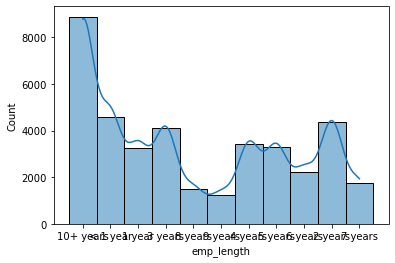

In [97]:
import seaborn as sns

# histogram
# display(sns.histplot(data = df1.emp_length, kde = True))
# display(sns.histplot(data = df1.emp_title, kde = True))
sns.histplot(data = df1.emp_length, kde = True)

In [111]:
# import plotly.express as px
# data = df1
# fig = px.histogram(data, x="emp_title")
# fig.show()

In [99]:
# sns.histplot(data = df1.emp_title, kde = True)

In [100]:
df_test = pd.DataFrame(df1[["id","emp_title"]].groupby("emp_title")["id"].count())
df_test.sort_values(by="id",ascending = False)

,id
emp_title,
US Army,134
Bank of America,109
IBM,66
AT&T,59
Kaiser Permanente,56
...,...
Hartford Financial Services Group,1
Hartford Board of Education,1
Harte Hanks,1


In [101]:
# import plotly.express as px
# data = df1
# fig = px.histogram(data, x="revol_util")
# fig.show()

<AxesSubplot:xlabel='revol_util', ylabel='Count'>

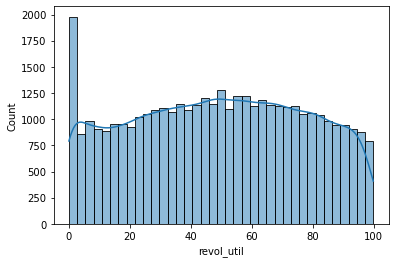

In [110]:
sns.histplot(data = df1.revol_util, kde = True)

In [103]:
df1["revol_util"] = df1["revol_util"].str.replace("%","").astype(float)
df1["revol_util"].mode(), df1["revol_util"].mean()

(0    0.0
 Name: revol_util, dtype: float64,
 48.83215241888721)

In [104]:
# filling Nulls with the most occuring category (Mode) or mean or unknown if the frequency of the values in a column is low
# filling with Mode
fill_na_cols_mode = ["emp_length", "last_pymnt_d", "title", "pub_rec_bankruptcies", "last_credit_pull_d"]
for i in fill_na_cols_mode:
    print("Mode " + i + " " + str(df1[i].mode()[0]))
    df1[i] = df1[i].fillna(value=df1[i].mode()[0])

# filling with Mean
fill_na_cols_mean = ["revol_util" ]
for i in fill_na_cols_mean:
    print("Mean" + i + " " + str(df1[i].mean()))
    df1[i] = df1[i].fillna(value=df1[i].mean())

# filling with Unknown
finn_na_unknown = ["emp_title"]
for i in finn_na_unknown:
    print("Unknown " + i)
    df1[i] = df1[i].fillna(value="Unknown")
    
df1.isna().sum()

Mode emp_length 10+ years
Mode last_pymnt_d May-16
Mode title Debt Consolidation
Mode pub_rec_bankruptcies 0.0
Mode last_credit_pull_d May-16
Meanrevol_util 48.83215241888721
Unknown emp_title


installment                    0
pub_rec                        0
home_ownership                 0
total_acc                      0
addr_state                     0
zip_code                       0
title                          0
issue_d                        0
last_pymnt_d                   0
dti                            0
emp_length                     0
last_credit_pull_d             0
member_id                      0
total_pymnt_inv                0
total_rec_int                  0
inq_last_6mths                 0
recoveries                     0
loan_status                    0
emp_title                      0
loan_amnt                      0
last_pymnt_amnt                0
purpose                        0
total_pymnt                    0
pub_rec_bankruptcies           0
revol_util                     0
out_prncp                      0
revol_bal                      0
collection_recovery_fee        0
grade                          0
annual_inc                     0
funded_amn

In [105]:
print(df1.url[0])
# df1["url"].str.replace("https://lendingclub.com/browse/loanDetail.action\?loan_id="," ")
df1[df1.url.str.replace("https://lendingclub.com/browse/loanDetail.action\?loan_id=","").astype(int)!=df1.id.astype(int)]

https://lendingclub.com/browse/loanDetail.action?loan_id=1077501


,installment,pub_rec,home_ownership,total_acc,addr_state,zip_code,title,issue_d,last_pymnt_d,dti,...,id,verification_status,desc,int_rate,funded_amnt,url,sub_grade,out_prncp_inv,total_rec_late_fee,delinq_2yrs


In [106]:
# Removing the columns which are not required or duplucate columns which can be derived from other columns
cols = ["desc","url"]
for i in cols:
    try:
        del df1[i]
    except:
        print("{0} not found".format(i))
        
df1.head()

,installment,pub_rec,home_ownership,total_acc,addr_state,zip_code,title,issue_d,last_pymnt_d,dti,...,open_acc,term,id,verification_status,int_rate,funded_amnt,sub_grade,out_prncp_inv,total_rec_late_fee,delinq_2yrs
0,162.87,0,RENT,9,AZ,860xx,Computer,Dec-11,Jan-15,27.65,...,3,36 months,1077501,Verified,10.65%,5000,B2,0.00,0.00,0
1,59.83,0,RENT,4,GA,309xx,bike,Dec-11,Apr-13,1.00,...,3,60 months,1077430,Source Verified,15.27%,2500,C4,0.00,0.00,0
2,84.33,0,RENT,10,IL,606xx,real estate business,Dec-11,Jun-14,8.72,...,2,36 months,1077175,Not Verified,15.96%,2400,C5,0.00,0.00,0
3,339.31,0,RENT,37,CA,917xx,personel,Dec-11,Jan-15,20.00,...,10,36 months,1076863,Source Verified,13.49%,10000,C1,0.00,16.97,0
4,67.79,0,RENT,38,OR,972xx,Personal,Dec-11,May-16,17.94,...,15,60 months,1075358,Source Verified,12.69%,3000,B5,524.06,0.00,0


In [107]:
df1.isna().sum()

installment                0
pub_rec                    0
home_ownership             0
total_acc                  0
addr_state                 0
zip_code                   0
title                      0
issue_d                    0
last_pymnt_d               0
dti                        0
emp_length                 0
last_credit_pull_d         0
member_id                  0
total_pymnt_inv            0
total_rec_int              0
inq_last_6mths             0
recoveries                 0
loan_status                0
emp_title                  0
loan_amnt                  0
last_pymnt_amnt            0
purpose                    0
total_pymnt                0
pub_rec_bankruptcies       0
revol_util                 0
out_prncp                  0
revol_bal                  0
collection_recovery_fee    0
grade                      0
annual_inc                 0
funded_amnt_inv            0
total_rec_prncp            0
earliest_cr_line           0
open_acc                   0
term          

In [108]:
# checking for any categorical variable with distinct count same as # of rows, This is to exclude the column from analysis
df1.nunique()

installment                15383
pub_rec                        5
home_ownership                 5
total_acc                     82
addr_state                    50
zip_code                     823
title                      19615
issue_d                       55
last_pymnt_d                 101
dti                         2868
emp_length                    11
last_credit_pull_d           106
member_id                  39717
total_pymnt_inv            37518
total_rec_int              35148
inq_last_6mths                 9
recoveries                  4040
loan_status                    3
emp_title                  28821
loan_amnt                    885
last_pymnt_amnt            34930
purpose                       14
total_pymnt                37850
pub_rec_bankruptcies           3
revol_util                  1090
out_prncp                   1137
revol_bal                  21711
collection_recovery_fee     2616
grade                          7
annual_inc                  5318
funded_amn

In [109]:
df1.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)